In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.feature_selection import SelectKBest
from sklearn.metrics import f1_score, precision_score, accuracy_score



In [2]:
df = pd.read_csv('data/diabetes_dataset.csv')
df.head()

,Target,Genetic Markers,Autoantibodies,Family History,Environmental Factors,Insulin Levels,Age,BMI,Physical Activity,Dietary Habits,...,Pulmonary Function,Cystic Fibrosis Diagnosis,Steroid Use History,Genetic Testing,Neurological Assessments,Liver Function Tests,Digestive Enzyme Levels,Urine Test,Birth Weight,Early Onset Symptoms
0,Steroid-Induced Diabetes,Positive,Negative,No,Present,40,44,38,High,Healthy,...,76,No,No,Positive,3,Normal,56,Ketones Present,2629,No
1,Neonatal Diabetes Mellitus (NDM),Positive,Negative,No,Present,13,1,17,High,Healthy,...,60,Yes,No,Negative,1,Normal,28,Glucose Present,1881,Yes
2,Prediabetic,Positive,Positive,Yes,Present,27,36,24,High,Unhealthy,...,80,Yes,No,Negative,1,Abnormal,55,Ketones Present,3622,Yes
3,Type 1 Diabetes,Negative,Positive,No,Present,8,7,16,Low,Unhealthy,...,89,Yes,No,Positive,2,Abnormal,60,Ketones Present,3542,No
4,Wolfram Syndrome,Negative,Negative,Yes,Present,17,10,17,High,Healthy,...,41,No,No,Positive,1,Normal,24,Protein Present,1770,No


In [3]:
df['Autoantibodies'].value_counts()

Autoantibodies
Negative    35058
Positive    34942
Name: count, dtype: int64

In [4]:
df.dtypes

Target                           object
Genetic Markers                  object
Autoantibodies                   object
Family History                   object
Environmental Factors            object
Insulin Levels                    int64
Age                               int64
BMI                               int64
Physical Activity                object
Dietary Habits                   object
Blood Pressure                    int64
Cholesterol Levels                int64
Waist Circumference               int64
Blood Glucose Levels              int64
Ethnicity                        object
Socioeconomic Factors            object
Smoking Status                   object
Alcohol Consumption              object
Glucose Tolerance Test           object
History of PCOS                  object
Previous Gestational Diabetes    object
Pregnancy History                object
Weight Gain During Pregnancy      int64
Pancreatic Health                 int64
Pulmonary Function                int64


In [5]:
df.columns

Index(['Target', 'Genetic Markers', 'Autoantibodies', 'Family History',
       'Environmental Factors', 'Insulin Levels', 'Age', 'BMI',
       'Physical Activity', 'Dietary Habits', 'Blood Pressure',
       'Cholesterol Levels', 'Waist Circumference', 'Blood Glucose Levels',
       'Ethnicity', 'Socioeconomic Factors', 'Smoking Status',
       'Alcohol Consumption', 'Glucose Tolerance Test', 'History of PCOS',
       'Previous Gestational Diabetes', 'Pregnancy History',
       'Weight Gain During Pregnancy', 'Pancreatic Health',
       'Pulmonary Function', 'Cystic Fibrosis Diagnosis',
       'Steroid Use History', 'Genetic Testing', 'Neurological Assessments',
       'Liver Function Tests', 'Digestive Enzyme Levels', 'Urine Test',
       'Birth Weight', 'Early Onset Symptoms'],
      dtype='object')

In [6]:
df['Urine Test'].value_counts()

Urine Test
Protein Present    17628
Normal             17528
Glucose Present    17422
Ketones Present    17422
Name: count, dtype: int64

In [7]:
df.drop_duplicates(inplace=True)

df.columns.shape

(34,)

In [8]:
df.describe()

,Insulin Levels,Age,BMI,Blood Pressure,Cholesterol Levels,Waist Circumference,Blood Glucose Levels,Weight Gain During Pregnancy,Pancreatic Health,Pulmonary Function,Neurological Assessments,Digestive Enzyme Levels,Birth Weight
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,21.607443,32.020700,24.782943,111.339543,194.867200,35.051657,160.701657,15.496414,47.564243,70.264671,1.804157,46.420529,3097.061071
std,10.785852,21.043173,6.014236,19.945000,44.532466,6.803461,48.165547,9.633096,19.984683,11.965600,0.680154,19.391089,713.837300
min,5.000000,0.000000,12.000000,60.000000,100.000000,20.000000,80.000000,0.000000,10.000000,30.000000,1.000000,10.000000,1500.000000
25%,13.000000,14.000000,20.000000,99.000000,163.000000,30.000000,121.000000,7.000000,32.000000,63.000000,1.000000,31.000000,2629.000000
50%,19.000000,31.000000,25.000000,113.000000,191.000000,34.000000,152.000000,16.000000,46.000000,72.000000,2.000000,48.000000,3103.000000
75%,28.000000,49.000000,29.000000,125.000000,225.000000,39.000000,194.000000,22.000000,64.000000,79.000000,2.000000,61.000000,3656.250000
max,49.000000,79.000000,39.000000,149.000000,299.000000,54.000000,299.000000,39.000000,99.000000,89.000000,3.000000,99.000000,4499.000000


In [9]:
df[df['Age'] < 0.001]

,Target,Genetic Markers,Autoantibodies,Family History,Environmental Factors,Insulin Levels,Age,BMI,Physical Activity,Dietary Habits,...,Pulmonary Function,Cystic Fibrosis Diagnosis,Steroid Use History,Genetic Testing,Neurological Assessments,Liver Function Tests,Digestive Enzyme Levels,Urine Test,Birth Weight,Early Onset Symptoms
13,Neonatal Diabetes Mellitus (NDM),Positive,Positive,No,Present,9,0,19,Low,Unhealthy,...,56,No,Yes,Negative,1,Normal,29,Glucose Present,2202,No
31,Neonatal Diabetes Mellitus (NDM),Positive,Negative,No,Present,11,0,18,Moderate,Unhealthy,...,73,No,No,Positive,2,Normal,25,Glucose Present,2889,No
85,Neonatal Diabetes Mellitus (NDM),Negative,Positive,No,Absent,6,0,12,High,Healthy,...,57,No,No,Positive,1,Abnormal,19,Glucose Present,2926,Yes
88,Neonatal Diabetes Mellitus (NDM),Positive,Negative,Yes,Present,11,0,15,Moderate,Healthy,...,76,Yes,No,Negative,2,Abnormal,23,Ketones Present,1762,Yes
95,Neonatal Diabetes Mellitus (NDM),Positive,Positive,No,Absent,9,0,17,High,Unhealthy,...,73,Yes,Yes,Positive,1,Normal,24,Glucose Present,2755,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69735,Neonatal Diabetes Mellitus (NDM),Negative,Positive,Yes,Absent,14,0,15,Moderate,Unhealthy,...,77,Yes,Yes,Positive,2,Normal,16,Glucose Present,1987,No
69742,Neonatal Diabetes Mellitus (NDM),Negative,Positive,Yes,Absent,10,0,14,Low,Unhealthy,...,63,No,No,Negative,2,Normal,19,Normal,1755,No
69808,Neonatal Diabetes Mellitus (NDM),Negative,Negative,No,Present,9,0,16,Low,Unhealthy,...,74,No,No,Negative,2,Abnormal,20,Glucose Present,2452,No
69956,Neonatal Diabetes Mellitus (NDM),Positive,Negative,No,Present,9,0,13,Moderate,Healthy,...,52,No,Yes,Positive,2,Normal,22,Normal,2684,No


In [10]:
df.head(36).columns

Index(['Target', 'Genetic Markers', 'Autoantibodies', 'Family History',
       'Environmental Factors', 'Insulin Levels', 'Age', 'BMI',
       'Physical Activity', 'Dietary Habits', 'Blood Pressure',
       'Cholesterol Levels', 'Waist Circumference', 'Blood Glucose Levels',
       'Ethnicity', 'Socioeconomic Factors', 'Smoking Status',
       'Alcohol Consumption', 'Glucose Tolerance Test', 'History of PCOS',
       'Previous Gestational Diabetes', 'Pregnancy History',
       'Weight Gain During Pregnancy', 'Pancreatic Health',
       'Pulmonary Function', 'Cystic Fibrosis Diagnosis',
       'Steroid Use History', 'Genetic Testing', 'Neurological Assessments',
       'Liver Function Tests', 'Digestive Enzyme Levels', 'Urine Test',
       'Birth Weight', 'Early Onset Symptoms'],
      dtype='object')

In [11]:
df['Target'].value_counts()

Target
MODY                                          5553
Secondary Diabetes                            5479
Cystic Fibrosis-Related Diabetes (CFRD)       5464
Type 1 Diabetes                               5446
Neonatal Diabetes Mellitus (NDM)              5408
Wolcott-Rallison Syndrome                     5400
Type 2 Diabetes                               5397
Prediabetic                                   5376
Gestational Diabetes                          5344
Type 3c Diabetes (Pancreatogenic Diabetes)    5320
Wolfram Syndrome                              5315
Steroid-Induced Diabetes                      5275
LADA                                          5223
Name: count, dtype: int64

In [12]:
df['Liver Function Tests'].value_counts()   

Liver Function Tests
Normal      35019
Abnormal    34981
Name: count, dtype: int64

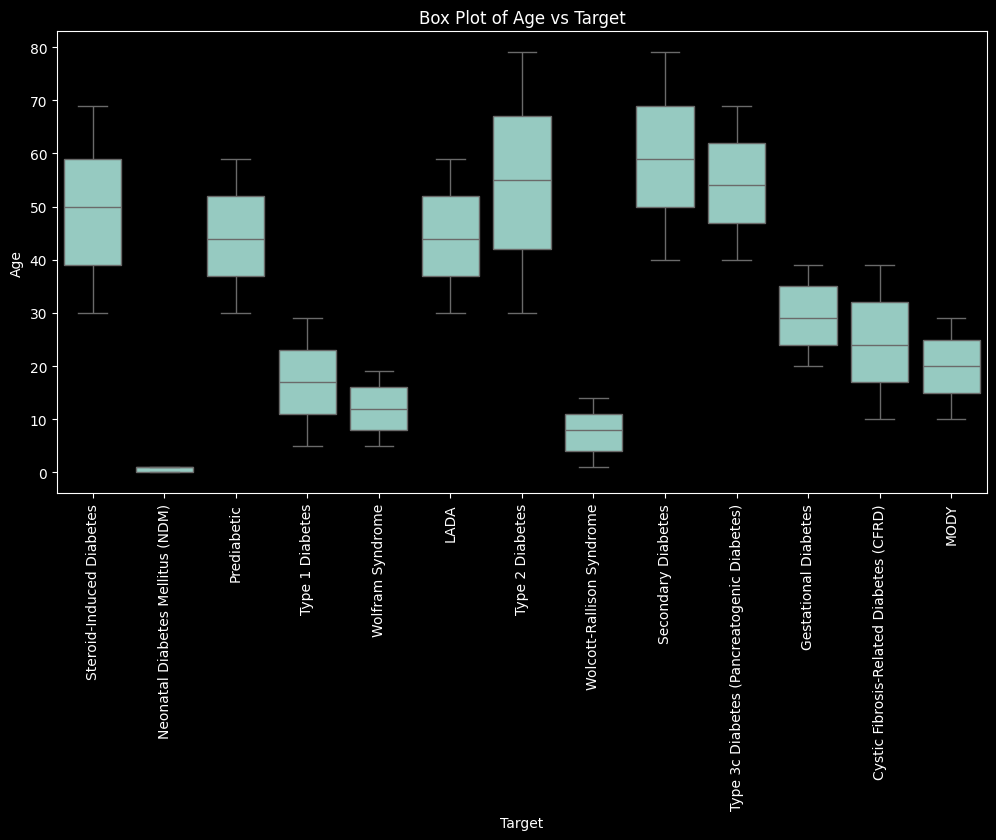

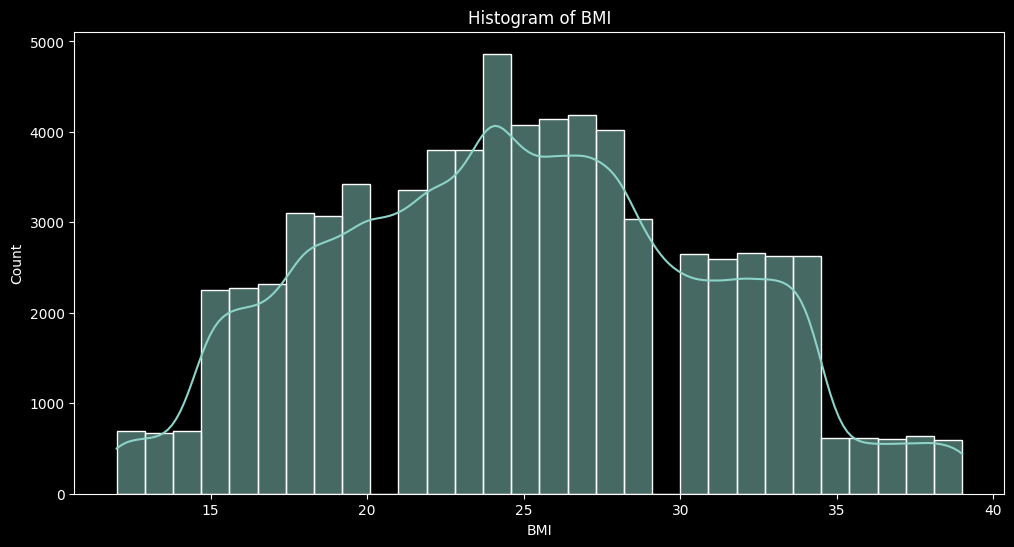

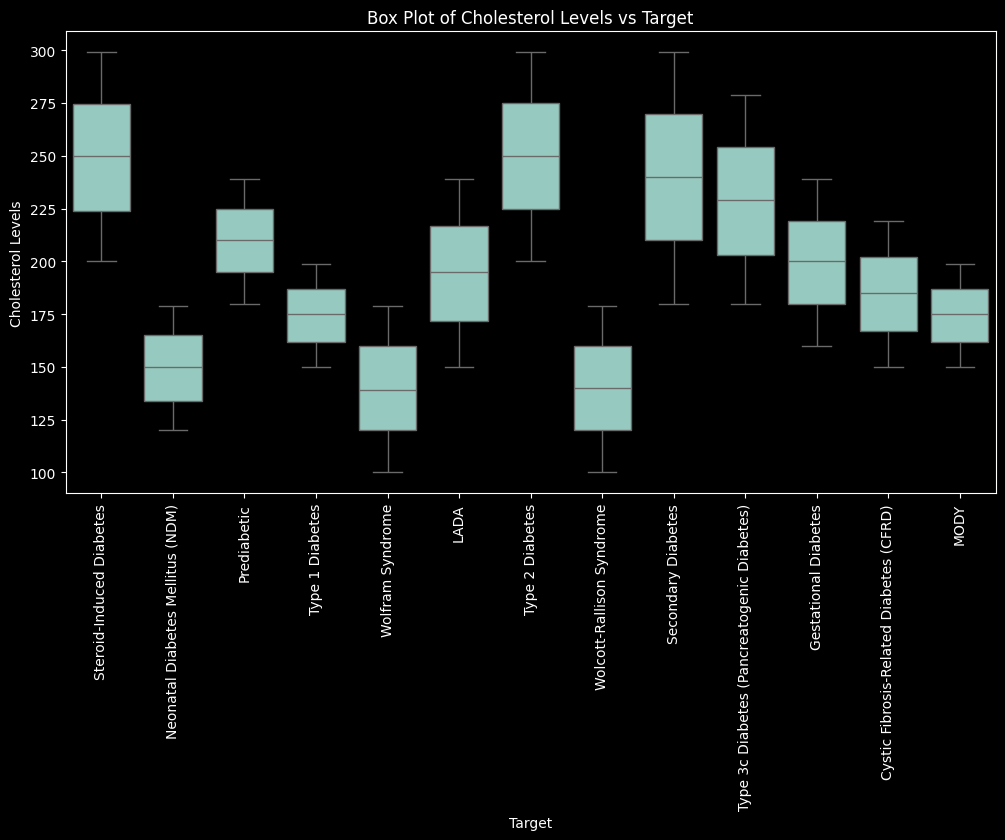

In [13]:
# Box Plot for Age vs Target
plt.figure(figsize=(12, 6))
sns.boxplot(x='Target', y='Age', data=df)
plt.title('Box Plot of Age vs Target')
plt.xticks(rotation=90)
plt.show()


# Histogram for BMI
plt.figure(figsize=(12, 6))
sns.histplot(df['BMI'], bins=30, kde=True)
plt.title('Histogram of BMI')
plt.show()


# Box Plot for Cholesterol Levels vs Target
plt.figure(figsize=(12, 6))
sns.boxplot(x='Target', y='Cholesterol Levels', data=df)
plt.title('Box Plot of Cholesterol Levels vs Target')
plt.xticks(rotation=90)
plt.show()

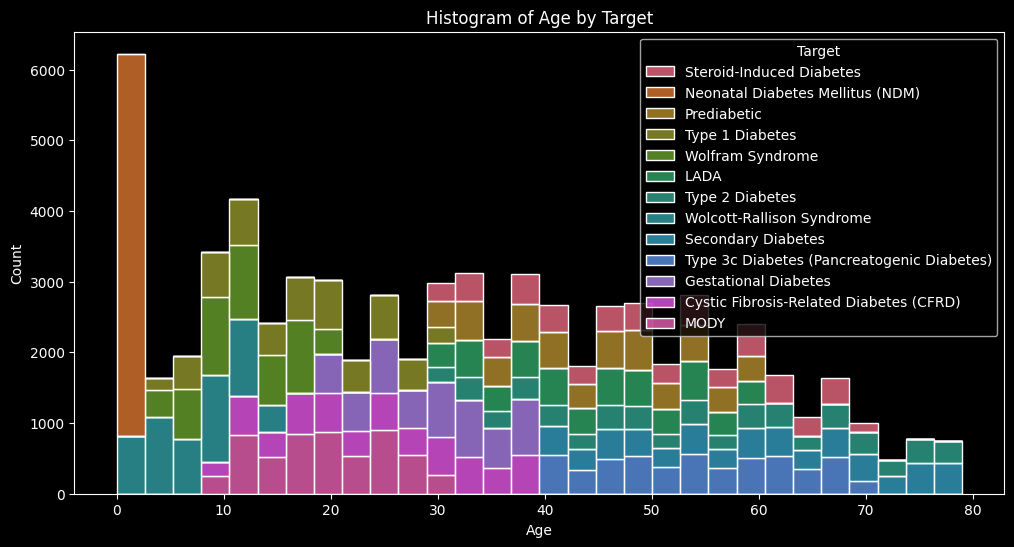

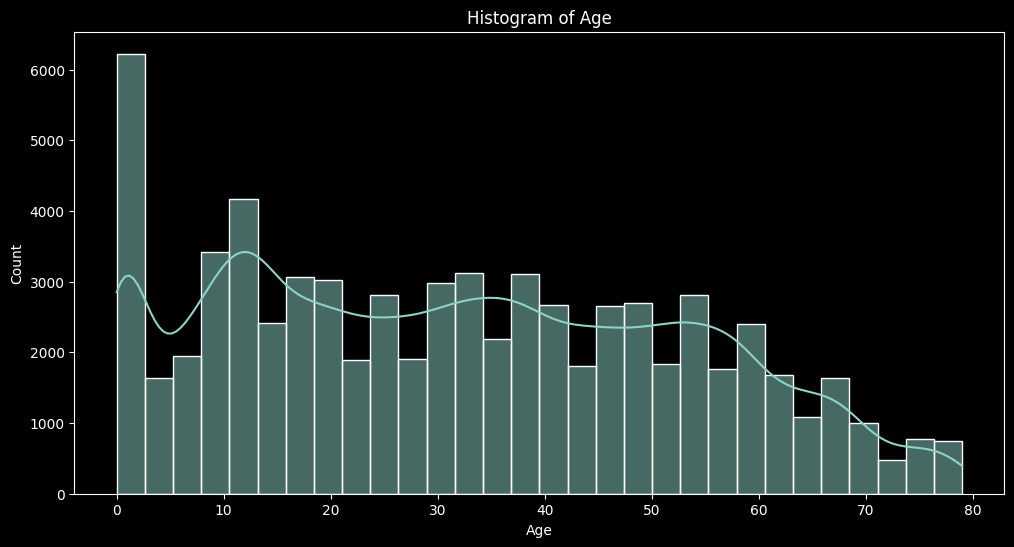

In [14]:
# Histogram for Target vs Age
plt.figure(figsize=(12, 6))
sns.histplot(data=df, x='Age', hue='Target', multiple='stack', bins=30)
plt.title('Histogram of Age by Target')
plt.show()

# Histogram for Age
plt.figure(figsize=(12, 6))
sns.histplot(df['Age'], bins=30, kde=True)
plt.title('Histogram of Age')
plt.show()

In [15]:
# Compute the correlation matrix#i 

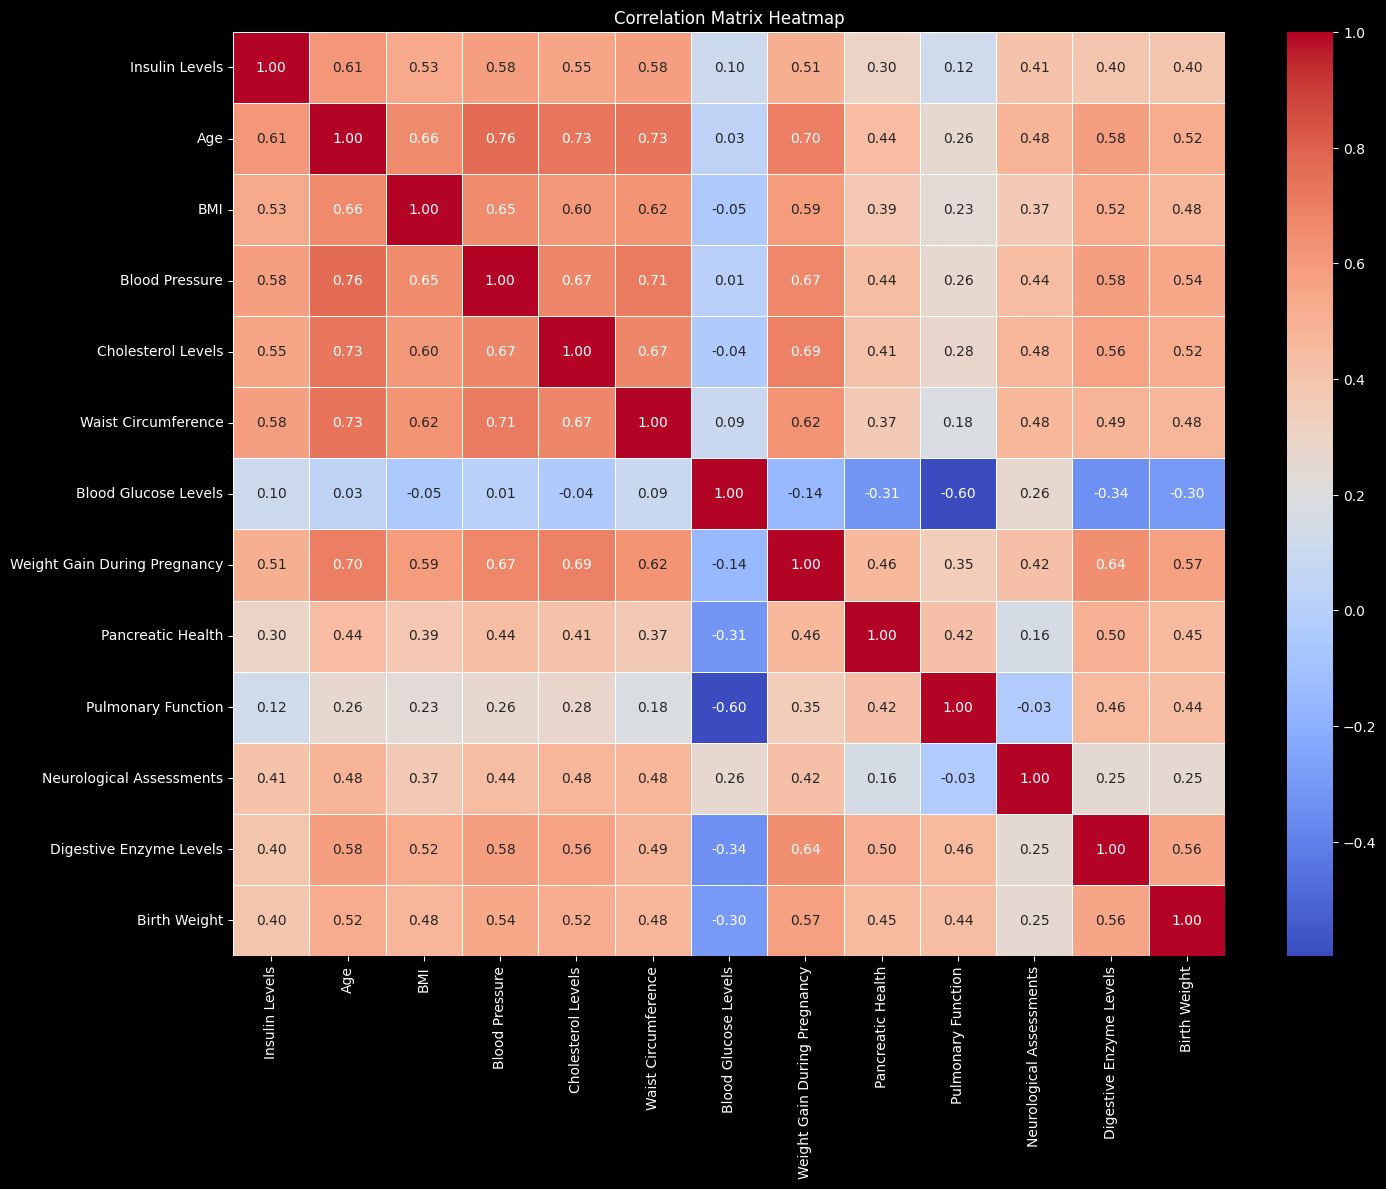

In [16]:
# Assuming df is your DataFrame
# df = pd.read_csv('your_dataset.csv')

# Select only numeric columns
numeric_df = df.select_dtypes(include=['float64', 'int64'])

# Compute the correlation matrix
corr_matrix = numeric_df.corr()

# Generate a heatmap
plt.figure(figsize=(16, 12))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix Heatmap')
plt.show()

### Features with High Correlation

The following pairs of features have a high correlation (correlation coefficient > 0.7):

1. **Age** and **Blood Pressure**: 0.763
2. **Age** and **Cholesterol Levels**: 0.730
3. **Age** and **Waist Circumference**: 0.734
4. **Age** and **Weight Gain During Pregnancy**: 0.698
5. **BMI** and **Age**: 0.663
6. **BMI** and **Blood Pressure**: 0.654
7. **Blood Pressure** and **Cholesterol Levels**: 0.675
8. **Blood Pressure** and **Waist Circumference**: 0.713
9. **Blood Pressure** and **Weight Gain During Pregnancy**: 0.667
10. **Cholesterol Levels** and **Waist Circumference**: 0.673
11. **Cholesterol Levels** and **Weight Gain During Pregnancy**: 0.692
12. **Waist Circumference** and **Weight Gain During Pregnancy**: 0.622
13. **Neurological Assessments** and **Digestive Enzyme Levels**: 0.639

### Features with High Correlation (> 0.6)

1. **Age** and **Insulin Levels**: 0.608
1. **BMI** and **Age**: 0.663
1. **Blood Pressure** and **Age**: 0.763
1. **Blood Pressure** and **BMI**: 0.654
1. **Cholesterol Levels** and **Age**: 0.730
1. **Cholesterol Levels** and **BMI**: 0.603
1. **Cholesterol Levels** and **Blood Pressure**: 0.675
1. **Waist Circumference** and **Age**: 0.734
1. **Waist Circumference** and **BMI**: 0.621
1. **Waist Circumference** and **Blood Pressure**: 0.713
1. **Waist Circumference** and **Cholesterol Levels**: 0.673
1. **Weight Gain During Pregnancy** and **Age**: 0.698
1. **Weight Gain During Pregnancy** and **Blood Pressure**: 0.667
1. **Weight Gain During Pregnancy** and **Cholesterol Levels**: 0.692
1. **Weight Gain During Pregnancy** and **Waist Circumference**: 0.622
1. **Digestive Enzyme Levels** and **Weight Gain During Pregnancy**: 0.639

### Features with High Inverse Correlation (< -0.6)

1. **Pulmonary Function** and **Blood Glucose Levels**: -0.598

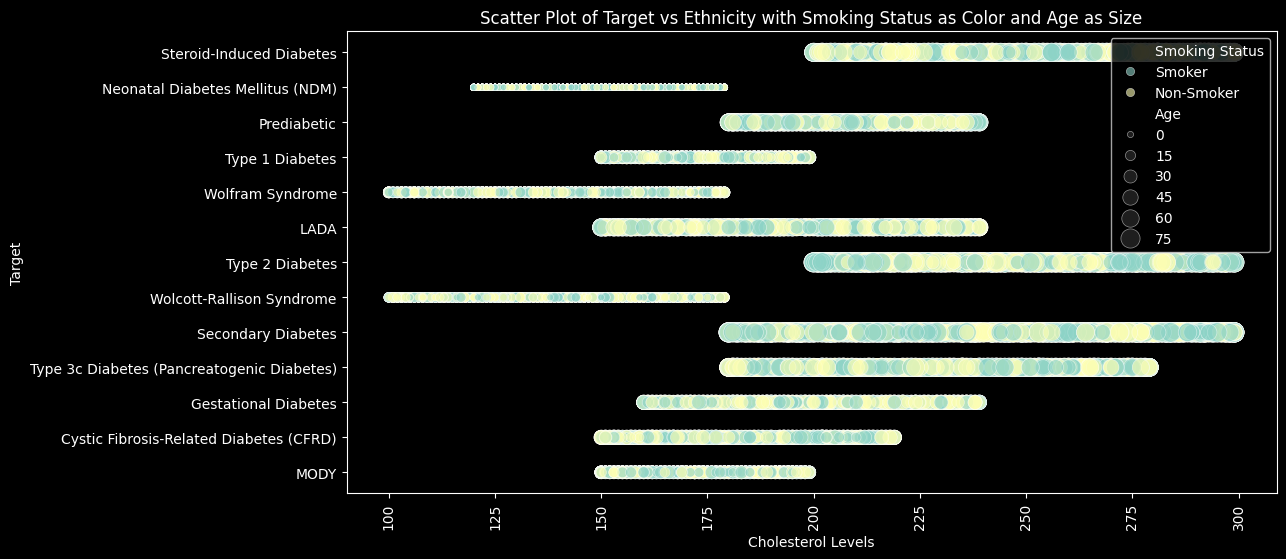

In [17]:
plt.figure(figsize=(12, 6))
sns.scatterplot(x='Cholesterol Levels', y='Target', hue='Smoking Status', size='Age', data=df, sizes=(20, 200), alpha=0.6)
plt.title('Scatter Plot of Target vs Ethnicity with Smoking Status as Color and Age as Size')
plt.xticks(rotation=90)
plt.show()

In [18]:
df.columns

Index(['Target', 'Genetic Markers', 'Autoantibodies', 'Family History',
       'Environmental Factors', 'Insulin Levels', 'Age', 'BMI',
       'Physical Activity', 'Dietary Habits', 'Blood Pressure',
       'Cholesterol Levels', 'Waist Circumference', 'Blood Glucose Levels',
       'Ethnicity', 'Socioeconomic Factors', 'Smoking Status',
       'Alcohol Consumption', 'Glucose Tolerance Test', 'History of PCOS',
       'Previous Gestational Diabetes', 'Pregnancy History',
       'Weight Gain During Pregnancy', 'Pancreatic Health',
       'Pulmonary Function', 'Cystic Fibrosis Diagnosis',
       'Steroid Use History', 'Genetic Testing', 'Neurological Assessments',
       'Liver Function Tests', 'Digestive Enzyme Levels', 'Urine Test',
       'Birth Weight', 'Early Onset Symptoms'],
      dtype='object')

In [19]:
df_temp = df.select_dtypes(include=['object']).columns
df_temp

Index(['Target', 'Genetic Markers', 'Autoantibodies', 'Family History',
       'Environmental Factors', 'Physical Activity', 'Dietary Habits',
       'Ethnicity', 'Socioeconomic Factors', 'Smoking Status',
       'Alcohol Consumption', 'Glucose Tolerance Test', 'History of PCOS',
       'Previous Gestational Diabetes', 'Pregnancy History',
       'Cystic Fibrosis Diagnosis', 'Steroid Use History', 'Genetic Testing',
       'Liver Function Tests', 'Urine Test', 'Early Onset Symptoms'],
      dtype='object')

In [20]:
# Assuming df is your DataFrame
binary_variables = [col for col in df.columns if df[col].nunique() == 2]

print("Variables with only two categories:")
binary_variables

Variables with only two categories:


['Genetic Markers',
 'Autoantibodies',
 'Family History',
 'Environmental Factors',
 'Dietary Habits',
 'Ethnicity',
 'Smoking Status',
 'Glucose Tolerance Test',
 'History of PCOS',
 'Previous Gestational Diabetes',
 'Pregnancy History',
 'Cystic Fibrosis Diagnosis',
 'Steroid Use History',
 'Genetic Testing',
 'Liver Function Tests',
 'Early Onset Symptoms']

In [21]:
df['Family History'].value_counts()

Family History
Yes    35168
No     34832
Name: count, dtype: int64

In [22]:
# Initialize LabelEncoder
label_encoder = LabelEncoder()

binary_variables = [col for col in df.columns if df[col].nunique() == 2]
# Apply label encoding to each binary column
for column in binary_variables:
    df[column] = label_encoder.fit_transform(df[column])

df[binary_variables] = df[binary_variables].astype('int8')

In [23]:
df.select_dtypes(include=['object']).columns


Index(['Target', 'Physical Activity', 'Socioeconomic Factors',
       'Alcohol Consumption', 'Urine Test'],
      dtype='object')

In [24]:
df_temp = df.select_dtypes(include=['object'])
df_temp = df_temp.drop('Target', axis=1)
df_temp.value_counts()

Physical Activity  Socioeconomic Factors  Alcohol Consumption  Urine Test     
High               High                   Moderate             Ketones Present    695
Low                Medium                 Low                  Ketones Present    695
Moderate           Medium                 Moderate             Normal             691
Low                Medium                 Low                  Normal             690
                                                               Protein Present    686
                                                                                 ... 
High               Medium                 High                 Normal             607
Low                High                   High                 Normal             607
                   Low                    High                 Glucose Present    602
Moderate           High                   High                 Glucose Present    590
Low                Medium                 Moderate           

In [25]:
# Replace 'Medium' with 'Moderate' in 'Socioeconomic Factors' column
df.replace({'Socioeconomic Factors': {'Medium': 'Moderate'}}, inplace=True)

df['Socioeconomic Factors'].value_counts()

Socioeconomic Factors
Moderate    23413
High        23304
Low         23283
Name: count, dtype: int64

In [26]:
# Columns to encode
columns_to_encode = ['Physical Activity', 'Socioeconomic Factors', 'Alcohol Consumption']

# Define the mapping for ordinal encoding
mapping = [['Low', 'Moderate', 'High']]

# Initialize the OrdinalEncoder with the defined mapping
encoder = OrdinalEncoder(categories=mapping)

for column in columns_to_encode:
    df[column] = encoder.fit_transform(df[column].values.reshape(-1, 1))


df[columns_to_encode] = df[columns_to_encode].astype('int8')
df[columns_to_encode].head()


,Physical Activity,Socioeconomic Factors,Alcohol Consumption
0,2,1,2
1,2,2,1
2,2,1,2
3,0,2,1
4,2,0,1


In [27]:
print(df.select_dtypes(include=['object']).columns)
print(df['Target'].value_counts())
print(df['Urine Test'].value_counts())


Index(['Target', 'Urine Test'], dtype='object')
Target
MODY                                          5553
Secondary Diabetes                            5479
Cystic Fibrosis-Related Diabetes (CFRD)       5464
Type 1 Diabetes                               5446
Neonatal Diabetes Mellitus (NDM)              5408
Wolcott-Rallison Syndrome                     5400
Type 2 Diabetes                               5397
Prediabetic                                   5376
Gestational Diabetes                          5344
Type 3c Diabetes (Pancreatogenic Diabetes)    5320
Wolfram Syndrome                              5315
Steroid-Induced Diabetes                      5275
LADA                                          5223
Name: count, dtype: int64
Urine Test
Protein Present    17628
Normal             17528
Glucose Present    17422
Ketones Present    17422
Name: count, dtype: int64


In [28]:
# Initialize the LabelEncoder
label_encoder = LabelEncoder()

# Apply label encoding to the target column
df['Target'] = label_encoder.fit_transform(df['Target'])
df['Target'] = df['Target'].astype('int8') 

df = pd.get_dummies(df, columns=['Urine Test'], prefix='Urine')
df.select_dtypes(include = 'bool').columns

Index(['Urine_Glucose Present', 'Urine_Ketones Present', 'Urine_Normal',
       'Urine_Protein Present'],
      dtype='object')

In [29]:
columns_to_cast = df.select_dtypes(include = 'bool').columns
df[columns_to_cast] = df[columns_to_cast].astype('int8')
df[columns_to_cast].dtypes

Urine_Glucose Present    int8
Urine_Ketones Present    int8
Urine_Normal             int8
Urine_Protein Present    int8
dtype: object

Mutual Information Scores:
Age                             1.180343
Blood Pressure                  0.899650
Weight Gain During Pregnancy    0.881764
Blood Glucose Levels            0.881748
Waist Circumference             0.837402
Cholesterol Levels              0.803200
Digestive Enzyme Levels         0.713417
BMI                             0.713145
Pulmonary Function              0.611937
Insulin Levels                  0.590197
dtype: float64


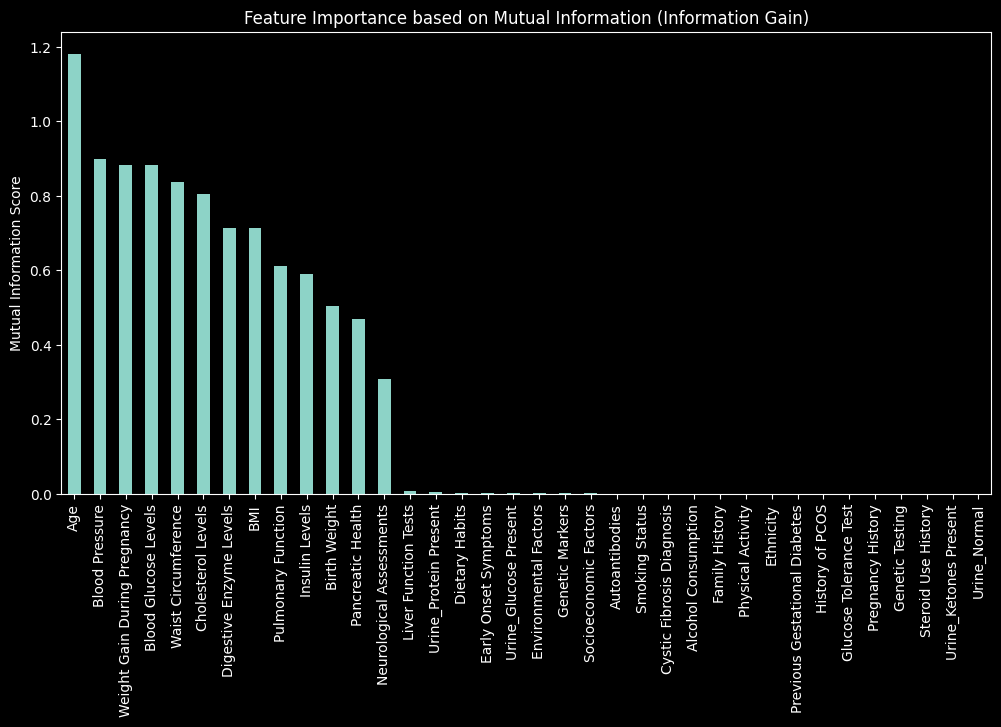

In [30]:
from sklearn.feature_selection import mutual_info_classif
import pandas as pd
import matplotlib.pyplot as plt


X = df.drop('Target', axis=1)
y = df['Target']


# Compute mutual information scores
mi_scores = mutual_info_classif(X, y, discrete_features='auto', random_state=42)

# Create a Series with feature names and their MI scores
mi_scores = pd.Series(mi_scores, index=X.columns)
mi_scores = mi_scores.sort_values(ascending=False)

# Display the scores
print("Mutual Information Scores:")
print(mi_scores.head(10))

# Plot the MI scores
plt.figure(figsize=(12, 6))
mi_scores.plot.bar()
plt.ylabel('Mutual Information Score')
plt.title('Feature Importance based on Mutual Information (Information Gain)')
plt.show()

Feature Variances:
Blood Glucose Levels             2319.919962
Cholesterol Levels               1983.140552
Age                               442.815140
Pancreatic Health                 399.387550
Blood Pressure                    397.803022
Digestive Enzyme Levels           376.014342
Pulmonary Function                143.175580
Insulin Levels                    116.334604
Weight Gain During Pregnancy       92.796541
Waist Circumference                46.287078
BMI                                36.171031
Alcohol Consumption                 0.666533
Socioeconomic Factors               0.665538
Physical Activity                   0.665335
Neurological Assessments            0.462609
Ethnicity                           0.250004
Liver Function Tests                0.250003
Dietary Habits                      0.250003
Previous Gestational Diabetes       0.250003
Smoking Status                      0.250003
Autoantibodies                      0.250003
Early Onset Symptoms                

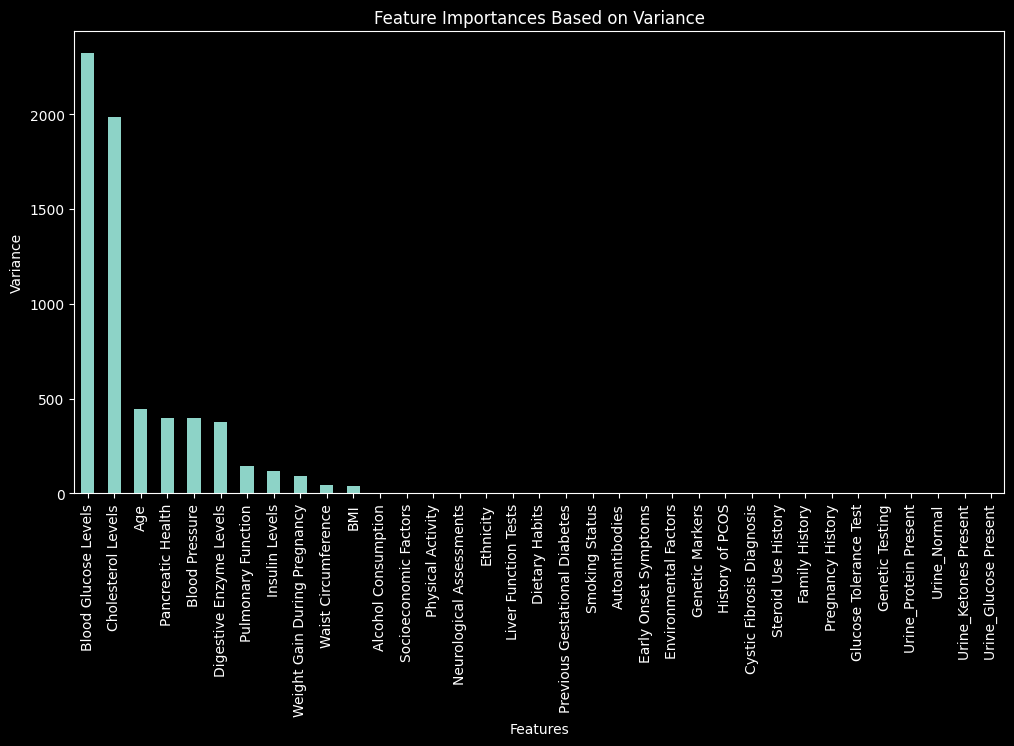

In [31]:
# Features and target
X = df.drop('Target', axis=1)
y = df['Target']
X = X.drop('Birth Weight', axis=1)

# Compute variance for each feature
variances = X.var()

# Create a Series with feature names and their variances
variance_series = pd.Series(variances, index=X.columns)
variance_series = variance_series.sort_values(ascending=False)

# Display the variances
print("Feature Variances:")
print(variance_series)

# Plot the feature importances based on variance
plt.figure(figsize=(12, 6))
variance_series.plot(kind='bar')
plt.xlabel('Features')
plt.ylabel('Variance')
plt.title('Feature Importances Based on Variance')
plt.show()

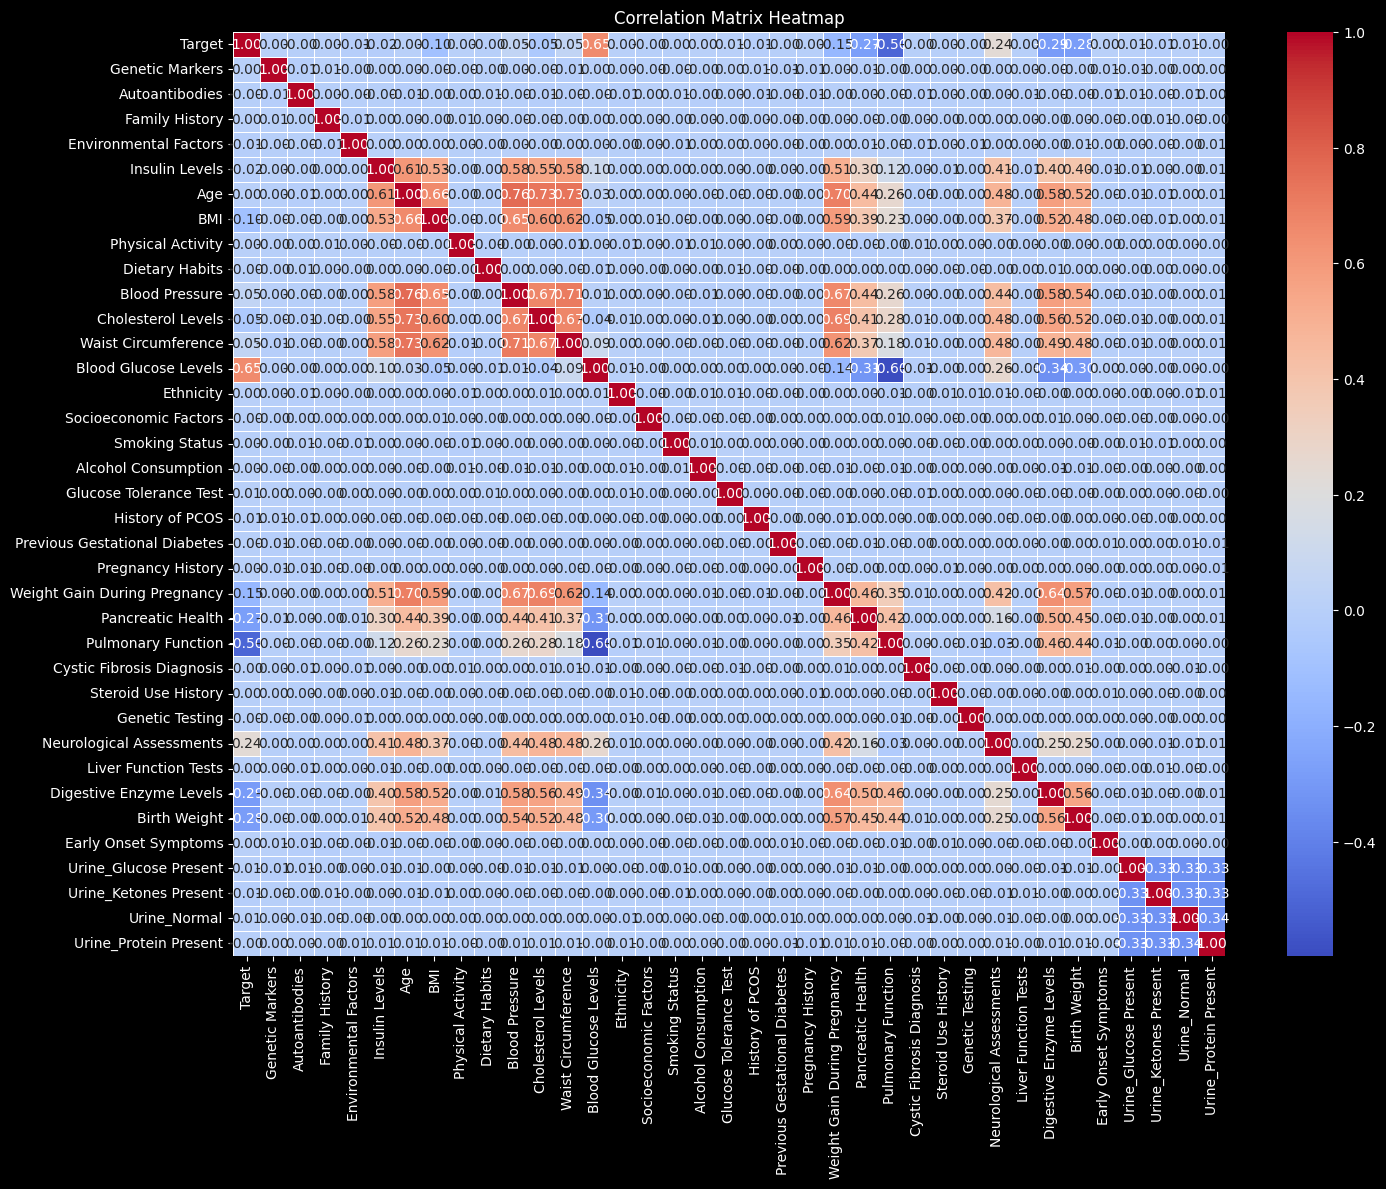

In [32]:
# Assuming df is your DataFrame
# df = pd.read_csv('your_dataset.csv')

# Select only numeric columns
numeric_df = df.select_dtypes(include=['number'])

# Compute the correlation matrix
corr_matrix = numeric_df.corr()
# Generate a heatmap
plt.figure(figsize=(16, 12))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix Heatmap')
plt.show()

## Splitting the dataset

In [ ]:
# Features and target
X = df.drop('Target', axis=1)
y = df['Target']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

(37,)

In [ ]:
# # Features and target


# from sklearn.feature_selection import RFE


# # Initialize the Random Forest classifier
# rf = RandomForestClassifier(random_state=42, n_jobs=-1)

# # Initialize RFE with the Random Forest classifier
# rfe = RFE(estimator=rf, n_features_to_select=10, verbose=1)

# # Fit RFE
# rfe.fit(X_train, y_train)

# # Get the selected features
# selected_features = X.columns[rfe.support_]

# print("Selected Features:", selected_features)

Fitting estimator with 36 features.


Fitting estimator with 35 features.
Fitting estimator with 34 features.
Fitting estimator with 33 features.
Fitting estimator with 32 features.
Fitting estimator with 31 features.
Fitting estimator with 30 features.
Fitting estimator with 29 features.
Fitting estimator with 28 features.
Fitting estimator with 27 features.
Fitting estimator with 26 features.
Fitting estimator with 25 features.
Fitting estimator with 24 features.
Fitting estimator with 23 features.
Fitting estimator with 22 features.
Fitting estimator with 21 features.
Fitting estimator with 20 features.
Fitting estimator with 19 features.
Fitting estimator with 18 features.
Fitting estimator with 17 features.
Fitting estimator with 16 features.
Fitting estimator with 15 features.
Fitting estimator with 14 features.
Fitting estimator with 13 features.
Fitting estimator with 12 features.
Fitting estimator with 11 features.
Selected Features: Index(['Insulin Levels', 'Age', 'BMI', 'Blood Pressure', 'Cholesterol Levels',
  

In [54]:
# Step 2: Perform feature selection on the training data
# Compute mutual information

# Initialize the Random Forest classifier
rf = RandomForestClassifier(random_state=42, n_jobs=-1)


mi_scores = mutual_info_classif(X_train, y_train)


# Select top k features
k = 10 # Number of features to select
selector = SelectKBest(mutual_info_classif, k=k)
selector.fit(X_train, y_train)

# Get selected feature indices
selected_indices = selector.get_support(indices=True)
selected_features = X_train.columns[selected_indices]
print("Selected Features:", selected_features)

# Step 3: Transform both training and testing data
X_train_selected = selector.transform(X_train)
X_test_selected = selector.transform(X_test)


Selected Features: Index(['Insulin Levels', 'Age', 'BMI', 'Blood Pressure', 'Cholesterol Levels',
       'Waist Circumference', 'Blood Glucose Levels',
       'Weight Gain During Pregnancy', 'Pulmonary Function',
       'Digestive Enzyme Levels'],
      dtype='object')


In [55]:
accuracy_list = []
precision_list = []
f1_list = []


rf.fit(X_train_selected, y_train)
y_pred = rf.predict(X_test_selected)

# Calculate metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

accuracy_list.append(accuracy)
precision_list.append(precision)
f1_list.append(f1)


# Initialize the Random Forest classifier
rf = RandomForestClassifier(random_state=42, n_jobs=-1)
    
# Train the model with PCA-transformed features
rf.fit(X_train, y_train)
    
# Predict on the test set
y_pred = rf.predict(X_test)

# Calculate metrics
original_accuracy = accuracy_score(y_test, y_pred)
original_precision = precision_score(y_test, y_pred, average='weighted')
original_f1 = f1_score(y_test, y_pred, average='weighted')

accuracy_list.append(original_accuracy)
precision_list.append(original_precision)
f1_list.append(original_f1)

print(f"Original Accuracy: {original_accuracy}")
print(f"Original Precision: {original_precision}")
print(f"Original F1 Score: {original_f1}")

Original Accuracy: 0.9
Original Precision: 0.9051928526308359
Original F1 Score: 0.8988469723022825


## Effect of applying PCA

In [56]:
from sklearn.metrics import f1_score, precision_score, accuracy_score


n_components_list = [1, 2, 4, 8, 16] 

# Loop over different numbers of principal components
for n_components in n_components_list:
    # Initialize PCA
    pca = PCA(n_components=n_components)
    
    # Fit PCA on the training set
    X_train_pca = pca.fit_transform(X_train)
    
    # Transform the testing set using the PCA fitted on the training set
    X_test_pca = pca.transform(X_test)
    
    # Initialize the Random Forest classifier
    rf = RandomForestClassifier(random_state=42, n_jobs=-1)
    
    # Train the model with PCA-transformed features
    rf.fit(X_train_pca, y_train)
    
    # Predict on the test set
    y_pred = rf.predict(X_test_pca)
    
    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    
    # Store results
    accuracy_list.append(accuracy)
    precision_list.append(precision)
    f1_list.append(f1)


n_components_list = ['infogain', 'NO PCA'] + n_components_list
print(len(accuracy_list), len(precision_list), len(f1_list), len(n_components_list))

# Create a DataFrame to store the results
metrics = pd.DataFrame({'accuracy' : accuracy_list,
                        'precision' : precision_list,
                        'F1' : f1_list,
                        'PCA components' : n_components_list})

metrics.set_index('PCA components', inplace=True)


7 7 7 7


<Figure size 1200x600 with 0 Axes>

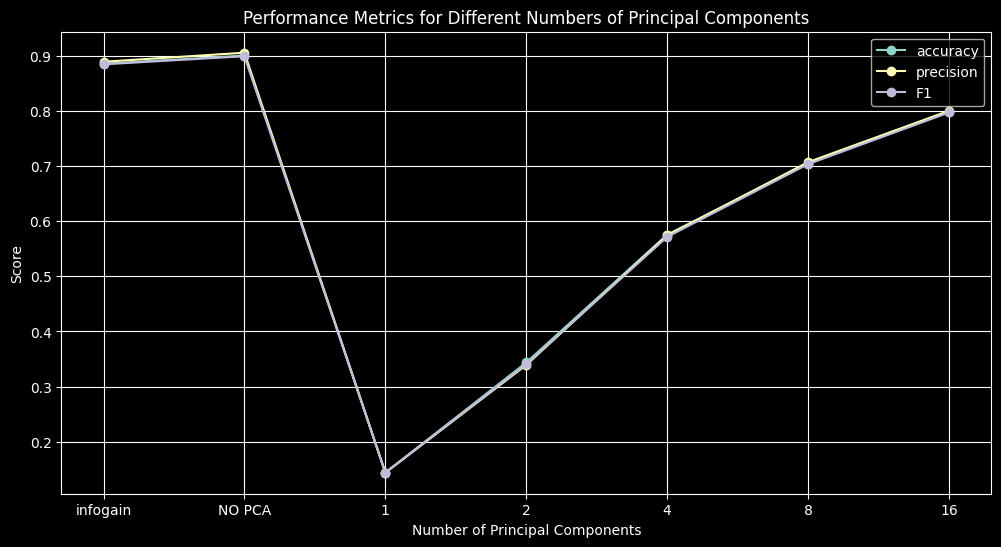

,accuracy,precision,F1
PCA components,,,
infogain,0.885286,0.888803,0.884134
NO PCA,0.900000,0.905193,0.898847
1,0.144143,0.143830,0.143933
2,0.343643,0.339142,0.340731
4,0.575500,0.574102,0.571325
8,0.704071,0.706801,0.703308
16,0.797786,0.800002,0.796840


In [57]:
# Plot the results
plt.figure(figsize=(12, 6))

metrics.plot(marker='o', figsize=(12, 6));

plt.xlabel('Number of Principal Components')
plt.ylabel('Score')
plt.title('Performance Metrics for Different Numbers of Principal Components')
plt.legend()
plt.grid(True)
plt.show();

metrics

In [39]:
# Initialize the Random Forest classifier for RFE
rf_rfe = RandomForestClassifier(random_state=42, n_jobs=-1)

# Select the important features from the training and testing sets
X_train_rfe = X_train[selected_features]
X_test_rfe = X_test[selected_features]

# Train the model with RFE-selected features
rf_rfe.fit(X_train_rfe, y_train)

# Predict on the test set
y_pred_rfe = rf_rfe.predict(X_test_rfe)

# Calculate metrics
rfe_accuracy = accuracy_score(y_test, y_pred_rfe)
rfe_precision = precision_score(y_test, y_pred_rfe, average='weighted')
rfe_f1 = f1_score(y_test, y_pred_rfe, average='weighted')

print(f"RFE Accuracy: {rfe_accuracy}")
print(f"RFE Precision: {rfe_precision}")
print(f"RFE F1 Score: {rfe_f1}")

RFE Accuracy: 0.8852857142857142
RFE Precision: 0.8888029166527979
RFE F1 Score: 0.8841339823068729


opw
